In [12]:
subcarrier_map = {
    1:-28,
    2:-26,
    3:-24,
    4:-22,
    5:-20,
    6:-18,
    7:-16,
    8:-14,
    9:-12,
    10:-10,
    11:-8,
    12:-6,
    13:-4,
    14:-2,
    15:-1,
    16:1,
    17:3,
    18:5,
    19:7,
    20:9,
    21:11,
    22:13,
    23:15,
    24:17,
    25:19,
    26:21,
    27:23,
    28:25,
    29:27,
    30:28,
}

In [7]:
# 'v' is variance;  'm' is mean
attack_configs = {
    4: {'v': 1, 'm': 0},
    7: {'v': 3, 'm': 0},
    28: {'v': 5, 'm': 0},
}

In [26]:
# check spec
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

def plot_spec(y, sample_rate = 20e6):
  yf = fft(y)
  N = len(y)
  xf = fftfreq(N, 1 / sample_rate)/1e6
  plt.plot(xf, np.abs(yf))
  plt.ylabel('Amplitude')
  plt.xlabel('Frequency(MHz)')
  plt.show()

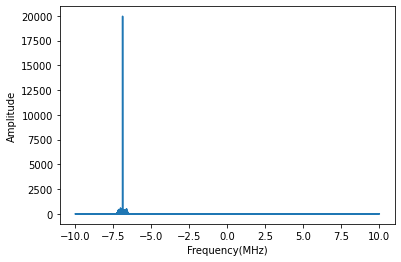

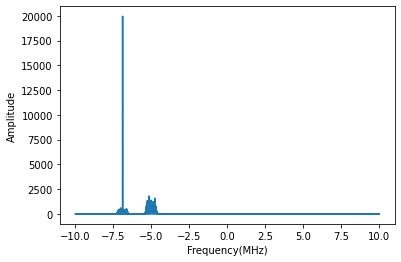

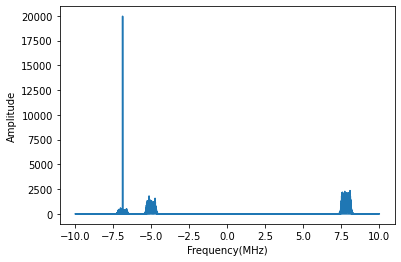

In [40]:
import numpy as np
base_signal = np.load('./signal_set/base.npy')

result = np.zeros(np.shape(base_signal))

for subidx in attack_configs:
    subcarrier_offset = subcarrier_map[subidx]
    
    config = attack_configs[subidx]
    sine_wave = np.load('./signal_set/sine_{}.npy'.format(abs(subcarrier_offset)))
    
    if subcarrier_offset > 0:
        result = result +  (config['v'] * base_signal + config['m']) * sine_wave 
    else:
        result = result +  (config['v'] * base_signal + config['m']) / sine_wave 

    plot_spec(result)

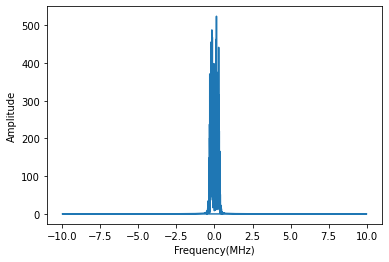

In [23]:
plot_spec(base_signal)

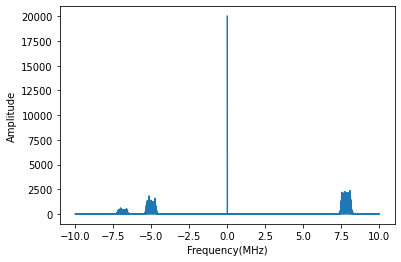

In [35]:
plot_spec(result)